Expliquer principe

Données à la date du 5 Avril 2021 - https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
%matplotlib inline

In [26]:
df = pd.read_csv('datas/covid19.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79662,ZWE,Africa,Zimbabwe,2021-04-01,36896.0,14.0,16.857,1523.0,0.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79663,ZWE,Africa,Zimbabwe,2021-04-02,36903.0,7.0,14.000,1524.0,1.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79664,ZWE,Africa,Zimbabwe,2021-04-03,36911.0,8.0,13.286,1524.0,0.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79665,ZWE,Africa,Zimbabwe,2021-04-04,36923.0,12.0,14.429,1525.0,1.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


Garder les données à la date du 1er Avril 2021 

In [27]:
df = df[df.date == '2021-04-01']
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
402,AFG,Asia,Afghanistan,2021-04-01,56517.0,63.0,41.571,2489.0,5.0,3.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
820,OWID_AFR,NaN,Africa,2021-04-01,4239457.0,22144.0,13054.857,113166.0,407.0,281.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1226,ALB,Europe,Albania,2021-04-01,125506.0,349.0,391.286,2241.0,6.0,8.143,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
1632,DZA,Africa,Algeria,2021-04-01,117304.0,112.0,108.714,3096.0,3.0,3.571,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
2032,AND,Europe,Andorra,2021-04-01,12053.0,43.0,52.286,115.0,0.0,0.143,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78095,VNM,Asia,Vietnam,2021-04-01,2617.0,14.0,5.429,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704
78535,OWID_WRL,NaN,World,2021-04-01,129607651.0,711626.0,588170.000,2827554.0,11861.0,10296.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
78896,YEM,Asia,Yemen,2021-04-01,4531.0,174.0,102.143,906.0,18.0,13.714,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470
79280,ZMB,Africa,Zambia,2021-04-01,88549.0,131.0,175.857,1212.0,4.0,3.000,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584


Garder que les colonnes à traiter et drop les lignes qui possède des cases vides, font d'elle non traitable

Mort par million étant donnée que des pays auront plus de mort seulement car plus de population

In [28]:
df = df[['iso_code', 'continent', 'location', 'reproduction_rate', 'total_deaths_per_million']]
df = df.dropna()
df

,iso_code,continent,location,reproduction_rate,total_deaths_per_million
402,AFG,Asia,Afghanistan,1.50,63.938
1226,ALB,Europe,Albania,0.79,778.720
1632,DZA,Africa,Algeria,0.99,70.603
2032,AND,Europe,Andorra,1.17,1488.384
2414,AGO,Africa,Angola,1.17,16.369
...,...,...,...,...,...
77656,VEN,South America,Venezuela,1.35,56.794
78095,VNM,Asia,Vietnam,1.27,0.360
78896,YEM,Asia,Yemen,1.36,30.376
79280,ZMB,Africa,Zambia,0.75,65.927


In [29]:
df.isnull().sum().sum()

0

<module 'matplotlib.pyplot' from 'C:\\Users\\laith\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

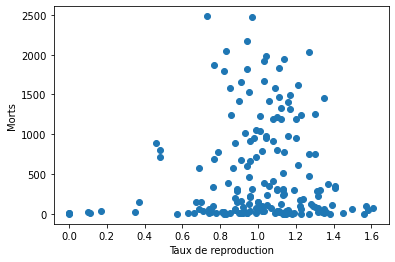

In [30]:
plt.scatter(df.reproduction_rate, df.total_deaths_per_million)
plt.xlabel('Taux de reproduction')
plt.ylabel('Morts')
plt

Besoin d'uniformiser / normaliser

In [31]:
scaler = MinMaxScaler()
df['reproduction_rate'] = scaler.fit_transform(df['reproduction_rate'].values.reshape(-1, 1))

df['total_deaths_per_million'] = scaler.fit_transform(df['total_deaths_per_million'].values.reshape(-1, 1))

df.head()

,iso_code,continent,location,reproduction_rate,total_deaths_per_million
402,AFG,Asia,Afghanistan,0.931677,0.025616
1226,ALB,Europe,Albania,0.490683,0.313575
1632,DZA,Africa,Algeria,0.614907,0.028301
2032,AND,Europe,Andorra,0.726708,0.599472
2414,AGO,Africa,Angola,0.726708,0.006453


Coude

In [32]:
k_range = range(1, 10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['reproduction_rate', 'total_deaths_per_million']])
    sse.append(km.inertia_)

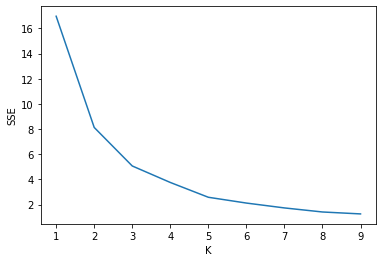

In [33]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)

3

In [34]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['reproduction_rate', 'total_deaths_per_million']])
df['cluster'] = y_predicted

In [35]:
def cluster_color(c):
    if c == 0:
        return 'blue'
    elif c == 1:
        return 'red'
    else:
        return 'green'

df['cluster_color'] = df.cluster.map(cluster_color)
df

,iso_code,continent,location,reproduction_rate,total_deaths_per_million,cluster,cluster_color
402,AFG,Asia,Afghanistan,0.931677,0.025616,0,blue
1226,ALB,Europe,Albania,0.490683,0.313575,2,green
1632,DZA,Africa,Algeria,0.614907,0.028301,0,blue
2032,AND,Europe,Andorra,0.726708,0.599472,1,red
2414,AGO,Africa,Angola,0.726708,0.006453,0,blue
...,...,...,...,...,...,...,...
77656,VEN,South America,Venezuela,0.838509,0.022738,0,blue
78095,VNM,Asia,Vietnam,0.788820,0.000003,0,blue
78896,YEM,Asia,Yemen,0.844720,0.012096,0,blue
79280,ZMB,Africa,Zambia,0.465839,0.026418,2,green


[[0.70708075 0.07845302]
 [0.64651484 0.58831615]
 [0.35896967 0.07313314]]


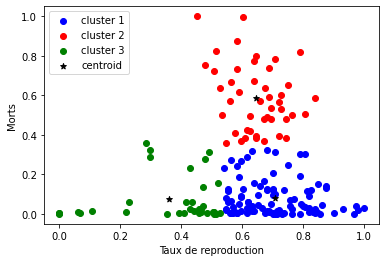

In [36]:
cluster0 = df[df.cluster == 0]
cluster1 = df[df.cluster == 1]
cluster2 = df[df.cluster == 2]

plt.scatter(cluster0.reproduction_rate, cluster0.total_deaths_per_million, color='blue', label='cluster 1')
plt.scatter(cluster1.reproduction_rate, cluster1.total_deaths_per_million, color='red', label='cluster 2')
plt.scatter(cluster2.reproduction_rate, cluster2.total_deaths_per_million, color='green', label='cluster 3')

print(km.cluster_centers_)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')

plt.xlabel('Taux de reproduction')
plt.ylabel('Morts')

plt.legend()

Voir quels pays concernés - Faible taux de naissance ont moins de mort

Ajouter lat et long selon code via https://gist.github.com/tadast/8827699

In [37]:
df_geo = pd.read_csv('datas/countries_codes_and_coordinates.csv')
df_geo = df_geo[['Alpha-3 code', 'Latitude', 'Longitude']]
df_geo

,Alpha-3 code,Latitude,Longitude
0,"""AFG""","""33""","""65"""
1,"""ALB""","""41""","""20"""
2,"""DZA""","""28""","""3"""
3,"""ASM""","""-14.3333""","""-170"""
4,"""AND""","""42.5""","""1.6"""
...,...,...,...
251,"""WLF""","""-13.3""","""-176.2"""
252,"""ESH""","""24.5""","""-13"""
253,"""YEM""","""15""","""48"""
254,"""ZMB""","""-15""","""30"""


In [38]:
df_geo = df_geo.applymap(lambda x: x.replace(' "', '') if (isinstance(x, str)) else x)
df_geo = df_geo.applymap(lambda x: x.replace('"', '') if (isinstance(x, str)) else x)
df_geo.head()

,Alpha-3 code,Latitude,Longitude
0,AFG,33,65
1,ALB,41,20
2,DZA,28,3
3,ASM,-14.3333,-170
4,AND,42.5,1.6


In [39]:
df_geo.Latitude[0]

'33'

In [40]:
df_geo.Latitude = df_geo.Latitude.map(lambda x: float(x))
df_geo.Longitude = df_geo.Longitude.map(lambda x: float(x))
df_geo.Latitude[0]

33.0

Données en double

In [41]:
df_geo.loc[df_geo['Alpha-3 code'] == 'VNM']

,Alpha-3 code,Latitude,Longitude
247,VNM,16.0,106.0
248,VNM,16.0,106.0


In [42]:
df_geo.drop_duplicates('Alpha-3 code', keep='last', inplace=True)
df_geo

,Alpha-3 code,Latitude,Longitude
0,AFG,33.0000,65.0
1,ALB,41.0000,20.0
2,DZA,28.0000,3.0
3,ASM,-14.3333,-170.0
4,AND,42.5000,1.6
...,...,...,...
251,WLF,-13.3000,-176.2
252,ESH,24.5000,-13.0
253,YEM,15.0000,48.0
254,ZMB,-15.0000,30.0


In [43]:
df_geo.loc[df_geo['Alpha-3 code'] == 'VNM']

,Alpha-3 code,Latitude,Longitude
248,VNM,16.0,106.0


In [44]:
df_geo.rename(columns = {'Alpha-3 code':'iso_code'}, inplace = True)
df_geo

,iso_code,Latitude,Longitude
0,AFG,33.0000,65.0
1,ALB,41.0000,20.0
2,DZA,28.0000,3.0
3,ASM,-14.3333,-170.0
4,AND,42.5000,1.6
...,...,...,...
251,WLF,-13.3000,-176.2
252,ESH,24.5000,-13.0
253,YEM,15.0000,48.0
254,ZMB,-15.0000,30.0


In [45]:
df_all = df.merge(df_geo)
df_all

,iso_code,continent,location,reproduction_rate,total_deaths_per_million,cluster,cluster_color,Latitude,Longitude
0,AFG,Asia,Afghanistan,0.931677,0.025616,0,blue,33.0,65.0
1,ALB,Europe,Albania,0.490683,0.313575,2,green,41.0,20.0
2,DZA,Africa,Algeria,0.614907,0.028301,0,blue,28.0,3.0
3,AND,Europe,Andorra,0.726708,0.599472,1,red,42.5,1.6
4,AGO,Africa,Angola,0.726708,0.006453,0,blue,-12.5,18.5
...,...,...,...,...,...,...,...,...,...
173,VEN,South America,Venezuela,0.838509,0.022738,0,blue,8.0,-66.0
174,VNM,Asia,Vietnam,0.788820,0.000003,0,blue,16.0,106.0
175,YEM,Asia,Yemen,0.844720,0.012096,0,blue,15.0,48.0
176,ZMB,Africa,Zambia,0.465839,0.026418,2,green,-15.0,30.0


Carte

In [47]:
from folium import (plugins, FeatureGroup, Map, Circle, Marker, LayerControl, Popup, CircleMarker, Vega)
world = Map(tiles='cartodbpositron')
from IPython.display import IFrame
opa = [0.99,0.99,0.5]
for i in df_all.index:
    CircleMarker([df_all.loc[i].Latitude, df_all.loc[i].Longitude], width=450, height=250, color=df_all.loc[i].cluster_color, radius=5, fill=True).add_to(world)

world